#important import files 

In [49]:
#important improt files 
import pandas as pd
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


os.chdir("C:\\Users\\ashut\\Desktop\\AnalytixLab Classes\\python teram 2\\Python Foundation Case Study 1 - Retail Case Study\\Case Study 1 - Retail Case Study")




1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.

In [51]:
customers = pd.read_csv('Customer.csv')
transactions = pd.read_csv('Transactions.csv')
product_hierarchy = pd.read_csv('prod_cat_info.csv')
# # Merge datasets
Final_data =pd.merge(left=customers,right=transactions,how = 'inner',left_on='customer_Id',right_on='cust_id')
Final_data =pd.merge(left=Final_data,right=product_hierarchy,how = 'inner',on='prod_cat_code')

Final_data.drop([ 'customer_Id', 'prod_sub_cat_code'], axis=1, inplace=True)

# #Finding information about the mearged sheet (Final_data) 
# Final_data.reset_index()
# Final_data.describe().T


###  2. Prepare a summary report for the merged data set.
# a. Get the column names and their corresponding data types
# b. Top/Bottom 10 observations
# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
# d. Frequency tables for all the categorical variables

In [53]:
 # a.Get the column names and their corresponding data types
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99293 entries, 0 to 99292
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DOB               99293 non-null  object 
 1   Gender            99253 non-null  object 
 2   city_code         99257 non-null  float64
 3   transaction_id    99293 non-null  int64  
 4   cust_id           99293 non-null  int64  
 5   tran_date         99293 non-null  object 
 6   prod_subcat_code  99293 non-null  int64  
 7   prod_cat_code     99293 non-null  int64  
 8   Qty               99293 non-null  int64  
 9   Rate              99293 non-null  int64  
 10  Tax               99293 non-null  float64
 11  total_amt         99293 non-null  float64
 12  Store_type        99293 non-null  object 
 13  prod_cat          99293 non-null  object 
 14  prod_subcat       99293 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 11.4+ MB


In [54]:
# b. Top/Bottom 10 observations
print('Top 10 obeservations')
Final_data.head(10)


Top 10 obeservations


,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Academic
2,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Non-Fiction
3,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Children
4,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Comics
5,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,DIY
6,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,Fiction
7,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,Academic
8,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,Non-Fiction
9,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,Children


In [55]:
print('Bottom 10 obeservations')
Final_data.tail(10)


Bottom 10 obeservations


,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
99283,09-12-1992,F,7.0,98631113719,274618,19-04-2013,3,1,2,721,151.41,1593.41,e-Shop,Clothing,Kids
99284,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,Clothing,Mens
99285,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,Clothing,Women
99286,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,Clothing,Kids
99287,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,Clothing,Mens
99288,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,Clothing,Women
99289,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,Clothing,Kids
99290,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,Clothing,Mens
99291,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,Clothing,Women
99292,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,Clothing,Kids


In [56]:
# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)¶
summary=Final_data.describe().T
summary=summary.rename(columns={'25%':'Q1','50%':'Median','75%':'Q3'})
summary[['min', 'Q1' , 'Median' , 'Q3' , 'max']]

,min,Q1,Median,Q3,max
city_code,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01
transaction_id,3268991.000,2.492150e+10,5.011083e+10,7.528121e+10,9.998755e+10
cust_id,266783.000,2.689560e+05,2.709820e+05,2.731200e+05,2.752650e+05
prod_subcat_code,1.000,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,1.000,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
Qty,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,-1499.000,3.130000e+02,7.130000e+02,1.109000e+03,1.500000e+03
Tax,7.350,9.828000e+01,1.999200e+02,3.669750e+02,7.875000e+02
total_amt,-8270.925,7.624500e+02,1.761370e+03,3.585725e+03,8.287500e+03


In [57]:
# d. Frequency tables for all the categorical variables
columns = Final_data.select_dtypes(include = ['object']).columns
for x in columns:
    print(F"\nFrequency Table : \n ''{x}'' Total value count : {Final_data[x].count()}\n No unique values count : {Final_data[x].nunique()}\n No unique values : {Final_data[x].unique()}")

# columns


Frequency Table : 
 ''DOB'' Total value count : 99293
 No unique values count : 3987
 No unique values : ['02-01-1970' '08-01-1970' '10-01-1970' ... '23-05-1991' '29-07-1991'
 '06-03-1992']

Frequency Table : 
 ''Gender'' Total value count : 99253
 No unique values count : 2
 No unique values : ['M' 'F' nan]

Frequency Table : 
 ''tran_date'' Total value count : 99293
 No unique values count : 1129
 No unique values : ['13-01-2014' '31-03-2013' '16-01-2014' ... '27-02-2014' '21-02-2014'
 '28-02-2014']

Frequency Table : 
 ''Store_type'' Total value count : 99293
 No unique values count : 4
 No unique values : ['TeleShop' 'MBR' 'e-Shop' 'Flagship store']

Frequency Table : 
 ''prod_cat'' Total value count : 99293
 No unique values count : 6
 No unique values : ['Books' 'Bags' 'Home and kitchen' 'Footwear' 'Electronics' 'Clothing']

Frequency Table : 
 ''prod_subcat'' Total value count : 99293
 No unique values count : 18
 No unique values : ['Fiction' 'Academic' 'Non-Fiction' 'Children

3. Generate histograms for all continuous variables and frequency bars for categorical variables.

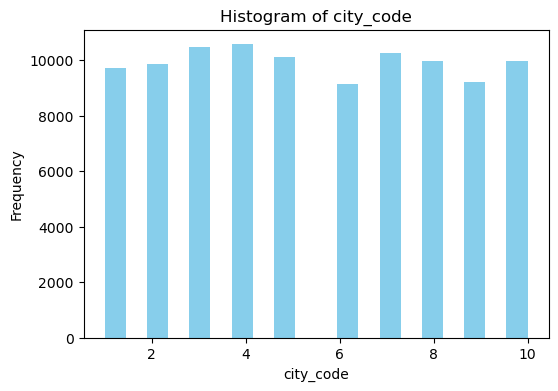

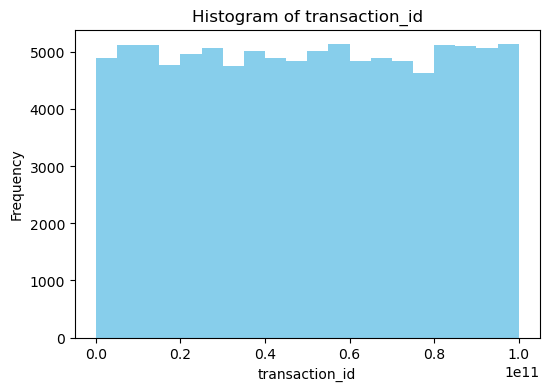

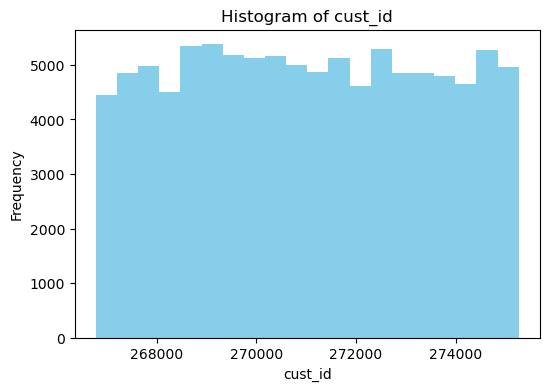

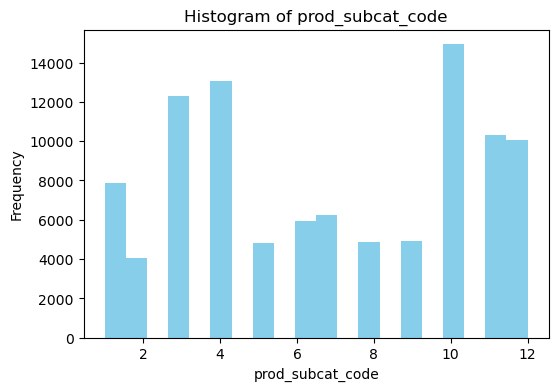

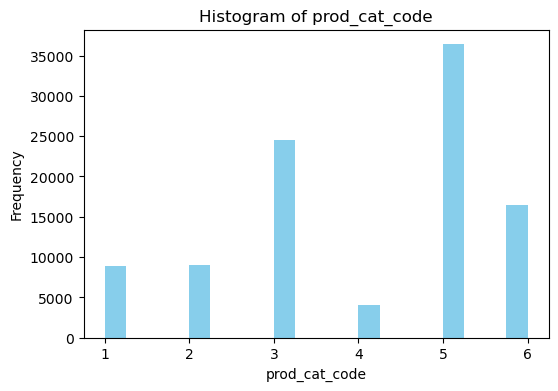

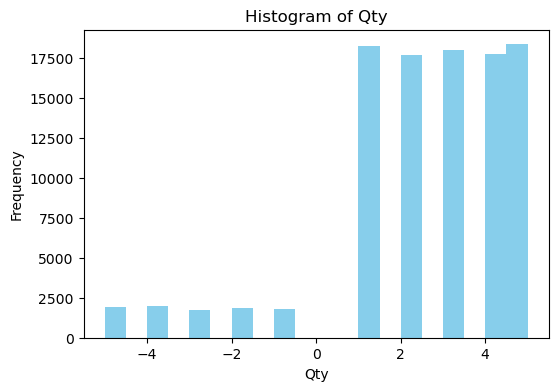

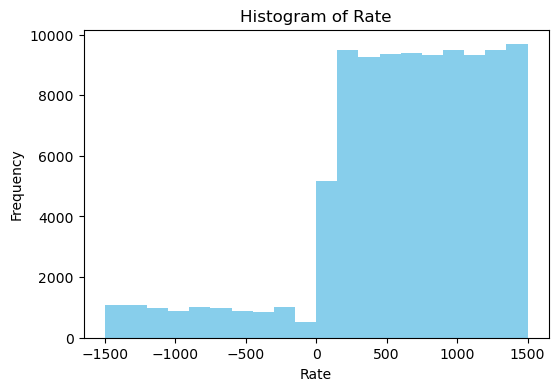

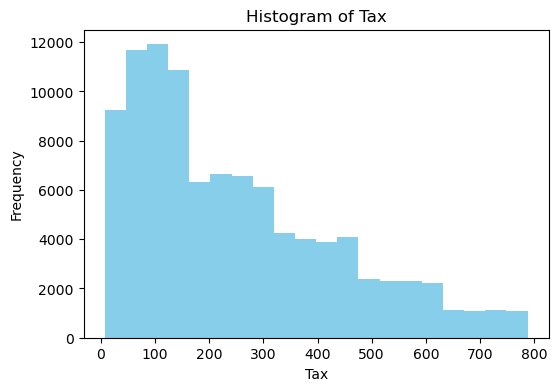

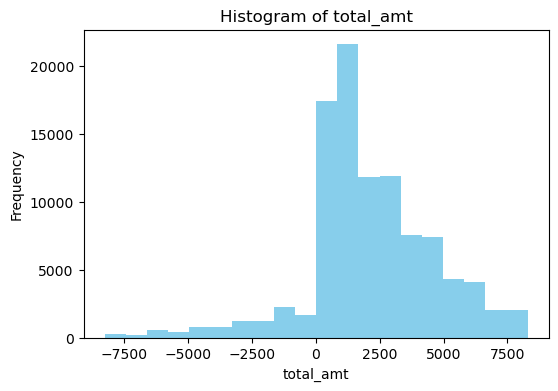

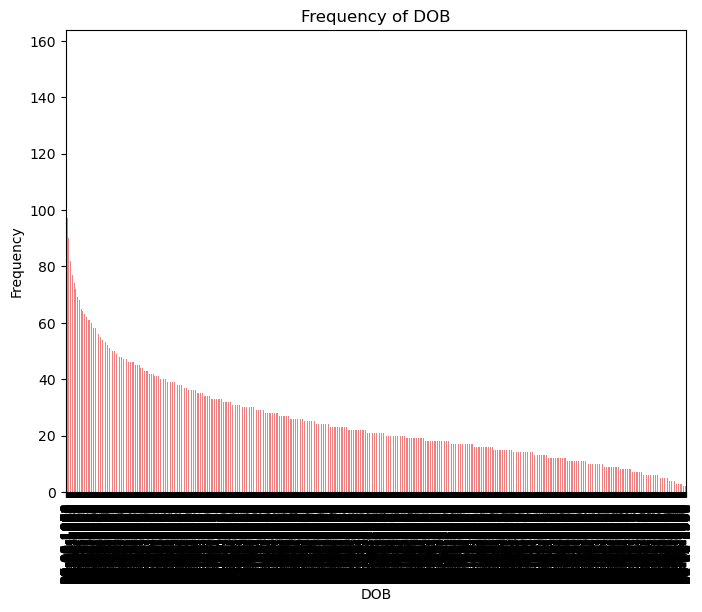

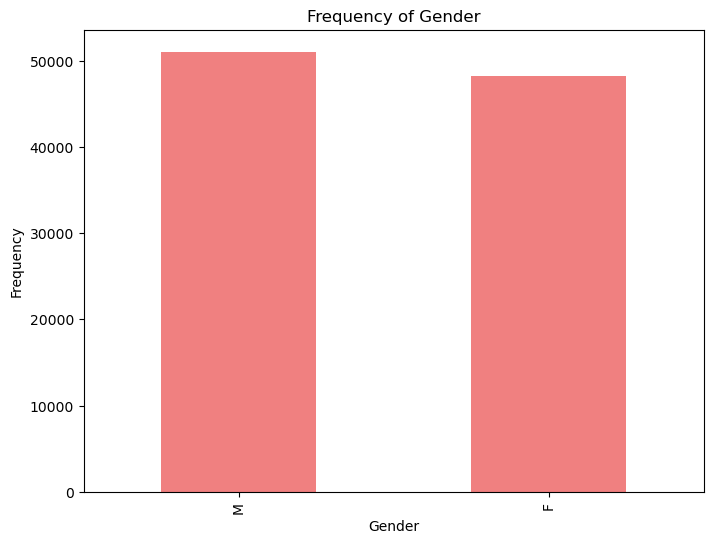

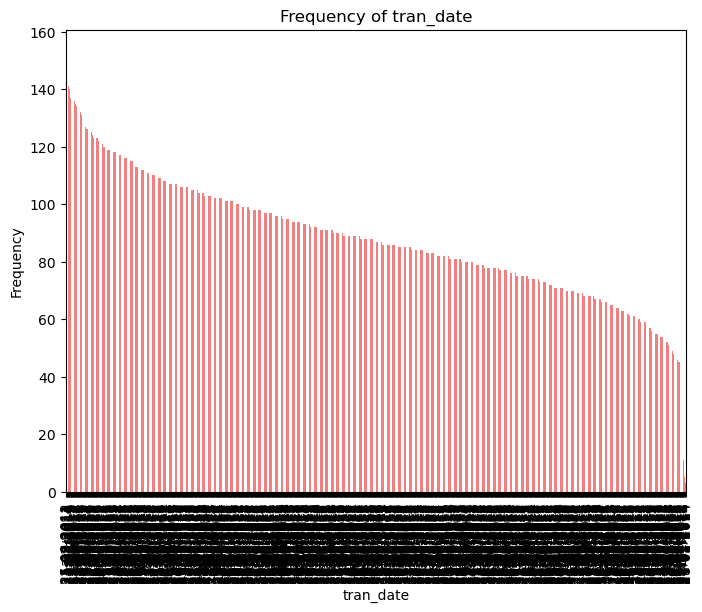

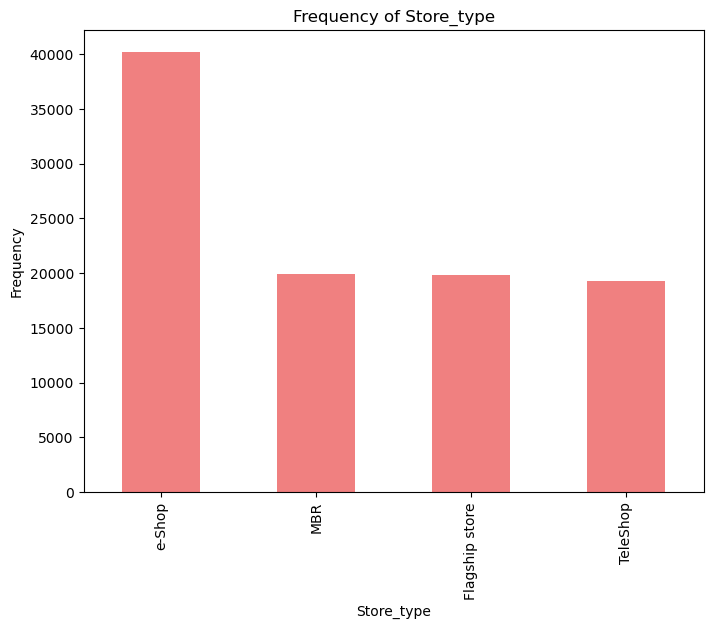

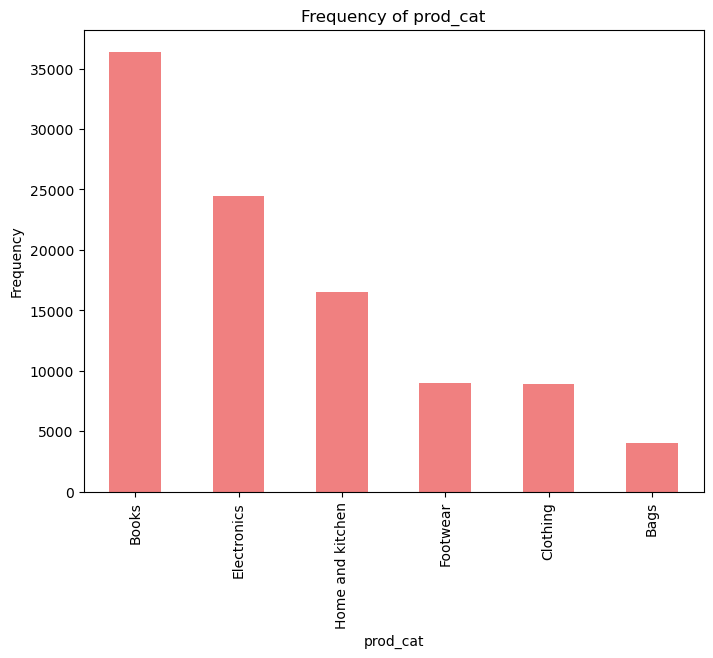

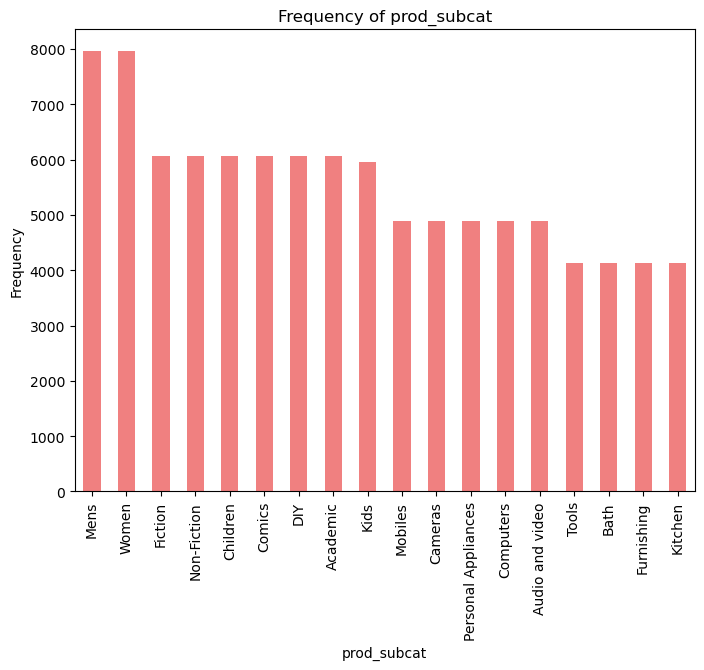

In [59]:
continuous_vars = Final_data.select_dtypes(include=['number']).columns
categorical_vars = Final_data.select_dtypes(include=['object']).columns

# Generate histograms for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    plt.hist(Final_data[var], bins=20, color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Generate frequency bars for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    Final_data[var].value_counts().plot(kind='bar', color='lightcoral')
    plt.title(f'Frequency of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

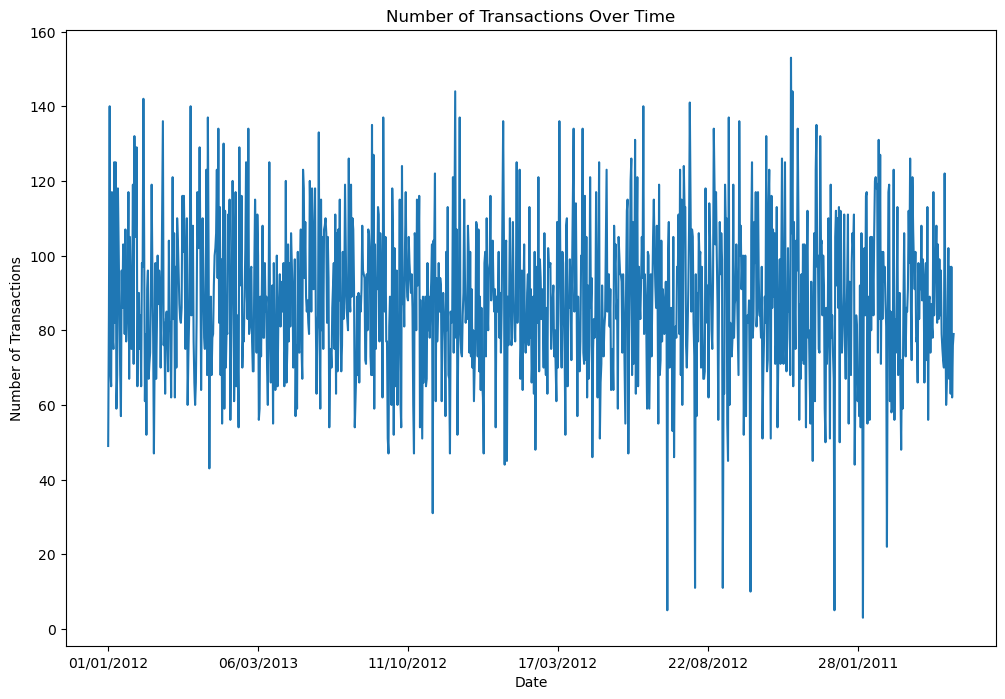

In [60]:
# Graph For tran_date vs no of transaction or frequncy
Final_data['tran_date'] =pd.to_datetime(Final_data['tran_date'], format='mixed').dt.strftime('%d/%m/%Y')
# # Group by tran_date and count the number of transactions for each date
transaction_count = Final_data.groupby('tran_date').size()

# # Create a time series plot
plt.figure(figsize=(12, 8))
transaction_count.plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

# 4. Calculate the following information using the merged dataset :
 # a. Time period of the available transaction data
 # b. Count of transactions where the total amount of transaction was negative

In [62]:
# a. Time period of the available transaction data
print(f"The Time period of the Available Transaction is From : {Final_data['tran_date'].min()} to {Final_data['tran_date'].max()}")

The Time period of the Available Transaction is From : 01/01/2012 to 31/12/2013


In [63]:
# b. Count of transactions where the total amount of transaction was negative
print(f"The Count of Negative transasaction Amount : {(Final_data['total_amt']< 0).sum()}")

The Count of Negative transasaction Amount : 9294


### 5. Analyze which product categories are more popular among females vs male customers.

In [65]:
categories=Final_data[['prod_cat','Qty','Gender'] ].sort_values(by=['Qty','Gender'],ascending=False).groupby(by=['Gender', 'prod_cat']).sum().unstack().fillna(0).reset_index()
print(f"For Male : {categories.iloc[1]} \n\n\n For Female: {categories.iloc[0]}")


For Male :         prod_cat        
Gender                          M
Qty     Bags                 4692
        Books               45522
        Clothing            11244
        Electronics         32380
        Footwear            10665
        Home and kitchen    20164
Name: 1, dtype: object 


 For Female:         prod_cat        
Gender                          F
Qty     Bags                 4724
        Books               42420
        Clothing            10275
        Electronics         29160
        Footwear            11148
        Home and kitchen    19580
Name: 0, dtype: object


####  From above analysis Male and Femail  are more likely to buy Books with total quantity of sale for Male  45522 and for Women 42420

Text(0.5, 1.0, 'product popular among females vs male customers')

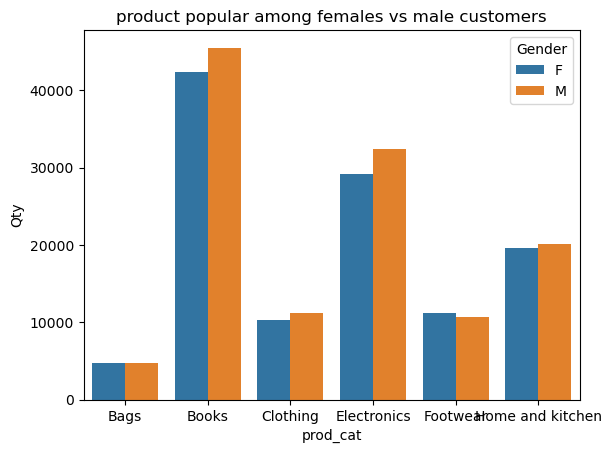

In [67]:
categories=Final_data[['prod_cat','Qty','Gender'] ].sort_values(by=['Qty','Gender'],ascending=False).groupby(by=['Gender', 'prod_cat']).sum()
categories.reset_index(inplace=True)
sns.barplot(data=categories,x='prod_cat', y= 'Qty',hue="Gender")
plt.title("product popular among females vs male customers")

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [69]:
Final_data.head(100)
max_customer = Final_data[['city_code','cust_id']].groupby(by='city_code').count().head()
max_customer = max_customer.sort_values(by='cust_id', ascending= False).reset_index().head(1)
max_customer.rename(columns = {'cust_id':"count_of_cust"},inplace=True)
p = (max_customer.count_of_cust/Final_data.cust_id.count())*100
print(f"The city Code has Max no of Customer Count is:\n {max_customer} \n & percentage of customer is: {p[0].round(2)} %")





The city Code has Max no of Customer Count is:
    city_code  count_of_cust
0        4.0          10571 
 & percentage of customer is: 10.65 %


### 7. Which store type sells the maximum products by value and by quantity

In [71]:
max_sell = Final_data[['Store_type','total_amt','Qty']].groupby(by=['Store_type','Qty']).count()
max_sell=max_sell.sort_values(by=['total_amt','Qty'] ,ascending = False).reset_index().head(1).set_index('Store_type')
print(f"store type sells the maximum products by value and by quantity is 'E-shop' with Qty = '5' and total sales of '7517' :\n {max_sell}")

store type sells the maximum products by value and by quantity is 'E-shop' with Qty = '5' and total sales of '7517' :
             Qty  total_amt
Store_type                
e-Shop        5       7517


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [73]:

max_sell = Final_data[(Final_data['prod_cat'].isin(['Electronics', 'Clothing'])) & (Final_data['Store_type'] == 'Flagship store')]
max_sell = max_sell['total_amt'].sum()
print(f"the total amount earned from the 'Electronics' and 'Clothing' categories from Flagship Stores is : {max_sell.round(2)}")

the total amount earned from the 'Electronics' and 'Clothing' categories from Flagship Stores is : 14658949.89


## 9. What was the total amount earned from "Male" customers under the "Electronics" category?


In [75]:
# # the total amount earned from "Male" customers under the "Electronics" category from Flagship Store.
max_sell = Final_data[(Final_data['Gender'] == 'M')&(Final_data['prod_cat'].isin(['Electronics'])) & (Final_data['Store_type'] == 'Flagship store')]
max_sell['total_amt'].sum().round(2)
print(f"the total amount earned from 'Male' customers under the 'Electronics' category from Flagship Stores is : {max_sell['total_amt'].sum().round(2)}")


the total amount earned from 'Male' customers under the 'Electronics' category from Flagship Stores is : 6070897.62


In [76]:
max_sell = Final_data[(Final_data['Gender'] == 'M')&(Final_data['prod_cat'].isin(['Electronics']))]
max_sell = max_sell['total_amt'].sum()
print(f"the total amount earned from 'Male' customers under the 'Electronics' category is : {max_sell.round(2)}")
max_sell

the total amount earned from 'Male' customers under the 'Electronics' category is : 28515547.12


28515547.125

## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [78]:
Final_data_ive = Final_data[Final_data['total_amt'] > 0]
unique_transaction = Final_data[['cust_id','transaction_id']].groupby(by='cust_id').nunique()
more_than_10 = unique_transaction[unique_transaction['transaction_id'] > 10].count().reset_index()
print(f"customers have more than 10 unique transactions, after removing all transactions which have any negative amounts is : {more_than_10[0][0]}")


customers have more than 10 unique transactions, after removing all transactions which have any negative amounts is : 6


## 11. For all customers aged between 25 - 35, find out:
 ### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [80]:
# Function to parse dates
def parse_date(date):
    date = str(date)
    for fmt in ("%d/%m/%Y", "%d-%m-%Y", "%m/%d/%Y", "%m-%d-%Y"):
        try:
            return datetime.strptime(date, fmt)
        except ValueError:
            pass
    return pd.NaT

# Apply the date parser
Final_data['DOB'] = Final_data['DOB'].apply(parse_date)
# Drop rows with NaT in DOB if any
Final_data = Final_data.dropna(subset=['DOB'])
# Format all dates to a single format, e.g., "DD/MM/YYYY"
Final_data['DOB'] = Final_data['DOB'].dt.strftime('%d/%m/%Y')

In [81]:
current_date = pd.Timestamp.now()
Final_data['Age'] = Final_data['DOB'].apply(lambda x: current_date.year - datetime.strptime(x, '%d/%m/%Y').year - ((current_date.month, current_date.day) < (datetime.strptime(x, '%d/%m/%Y').month, datetime.strptime(x, '%d/%m/%Y').day)))
cust_25_35 = Final_data[(Final_data['Age'] >= 25) & (Final_data['Age'] <= 35)]
cust_25_35  = cust_25_35[cust_25_35['prod_cat'].isin(['Electronics', 'Books'])]
total_amount_spent = cust_25_35 ['total_amt'].sum()
print("Total amount spent by customers aged 25-35 for 'Electronics' and 'Books' categories:", total_amount_spent)

Total amount spent by customers aged 25-35 for 'Electronics' and 'Books' categories: 24896251.12


 ### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [83]:
cust_25_35['tran_date'] = pd.to_datetime(cust_25_35['tran_date'] ,format='%d/%m/%Y', errors='coerce')
start_date = datetime.strptime('01/01/2014', '%d/%m/%Y')
end_date = datetime.strptime('01/03/2014', '%d/%m/%Y')

cust = cust_25_35[(cust_25_35['tran_date'] >= start_date) & (cust_25_35['tran_date'] <= end_date)]
total_amount = cust['total_amt'].sum().round(2)
print(F"Total amount spent by customers aged 25-35 between 1st Jan, 2014 to 1st Mar, 2014: ₹{total_amount}")

Total amount spent by customers aged 25-35 between 1st Jan, 2014 to 1st Mar, 2014: ₹850508.56


In [84]:
# Convert TransactionDate to datetime for filtering by date range
Final_data['tran_date'] = pd.to_datetime(Final_data['tran_date'], format='%d/%m/%Y', errors='coerce')
# Define the date range
start_date = datetime.strptime('01/01/2014', '%d/%m/%Y')
end_date = datetime.strptime('01/03/2014', '%d/%m/%Y')
# Filter transactions within the date range
transactions_date_filtered = Final_data[(Final_data['tran_date'] >= start_date) & (Final_data['tran_date'] <= end_date)]
# Further filter to customers aged 25-35
transactions_date_filtered = transactions_date_filtered[(transactions_date_filtered['Age'] >= 25) & (transactions_date_filtered['Age'] <= 35)]
# Calculate the total amount spent in the specified date range
total_amount_spent_date_range = transactions_date_filtered['total_amt'].sum()
print(F"Total amount spent by customers aged 25-35 between 1st Jan, 2014 to 1st Mar, 2014: ₹{total_amount_spent_date_range}")

Total amount spent by customers aged 25-35 between 1st Jan, 2014 to 1st Mar, 2014: ₹1488725.615
